In [1]:
# 3 CSV files with slightly different structures, containing price predictions (and confidence interval values) up to 2025-05-02.
# renaming of columns to comply with naming conventions of project

import pandas as pd
# Read the CSV files
df_0407 = pd.read_csv('Price_Preds_Processed_20250407.csv')
df_0411 = pd.read_csv('Price_Preds_Processed_20250411.csv')
df_0531 = pd.read_csv('Price_Preds_Processed_20250531.csv')

# Drop Price column from the first two dataframes, as this was a price including tax, which is not needed
df_0407 = df_0407.drop('Price', axis=1)
df_0411 = df_0411.drop('Price', axis=1)

# Convert timestamp columns to datetime for proper comparison
for df in [df_0407, df_0411, df_0531]:
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df['date_timestamp'] = pd.to_datetime(df['date_timestamp'])
    df['date_time'] = pd.to_datetime(df['date_time'])

# Combine dataframes, keeping only unique records
combined = pd.concat([df_0407, df_0411, df_0531], ignore_index=True)
combined = combined.drop_duplicates(subset=['timestamp', 'x', 'y', 'subarray'])

# Sort by timestamp
combined = combined.sort_values('timestamp')

# Drop 'x' column
combined = combined.drop('x', axis=1)
# rename 'y' column to 'Price_Pred' 
combined = combined.rename(columns={'y': 'Price_Pred'})
# rename  timestamp to run_timestamp
combined = combined.rename(columns={'timestamp': 'run_time'})
# rename date_timestamp to run_date
combined = combined.rename(columns={'date_timestamp': 'run_date'})
#rename hour_timestamp to run_hour
combined = combined.rename(columns={'hour_timestamp': 'run_hour'})
# rename date_time to target_datetime
combined = combined.rename(columns={'date_time': 'target_datetime'})

print(combined.head())


     Price_Pred                         run_time  subarray   run_date  \
0         0.010 2025-02-24 15:40:49.845469+00:00         0 2025-02-24   
642       0.151 2025-02-24 15:40:49.845469+00:00         4 2025-02-24   
643       0.136 2025-02-24 15:40:49.845469+00:00         5 2025-02-24   
644       0.132 2025-02-24 15:40:49.845469+00:00         1 2025-02-24   
645       0.146 2025-02-24 15:40:49.845469+00:00         2 2025-02-24   

     run_hour     target_datetime  
0          15 2025-02-24 00:00:00  
642        15 2025-02-28 22:00:00  
643        15 2025-02-28 22:00:00  
644        15 2025-02-28 23:00:00  
645        15 2025-02-28 23:00:00  


In [2]:
#create subset, containing only point estimates of price predictions; subarray == 1
point_est_price_df = combined[combined['subarray'] == 1]
# Drop 'subarray' column from point estimates dataframe
point_est_price_df = point_est_price_df.drop('subarray', axis=1)

print(f"Total rows in point_estimates dataset: {len(point_est_price_df)}")
print("\nSample of point_estimates data:")
print(point_est_price_df.head())


Total rows in point_estimates dataset: 162359

Sample of point_estimates data:
     Price_Pred                         run_time   run_date  run_hour  \
644       0.132 2025-02-24 15:40:49.845469+00:00 2025-02-24        15   
649       0.135 2025-02-24 15:40:49.845469+00:00 2025-02-24        15   
654       0.127 2025-02-24 15:40:49.845469+00:00 2025-02-24        15   
659       0.123 2025-02-24 15:40:49.845469+00:00 2025-02-24        15   
664       0.119 2025-02-24 15:40:49.845469+00:00 2025-02-24        15   

        target_datetime  
644 2025-02-28 23:00:00  
649 2025-03-01 00:00:00  
654 2025-03-01 01:00:00  
659 2025-03-01 02:00:00  
664 2025-03-01 03:00:00  


In [3]:
# Sort by run_time first to ensure we keep the earliest entry
point_est_price_df = point_est_price_df.sort_values('run_time')

# Drop duplicates keeping first occurrence (earliest run_time)
point_est_price_df = point_est_price_df.drop_duplicates(
    subset=['run_date', 'target_datetime'], 
    keep='first'
)

# Print the shape of the resulting dataframe
print(f"Shape after removing duplicates: {point_est_price_df.shape}")

Shape after removing duplicates: (14132, 5)


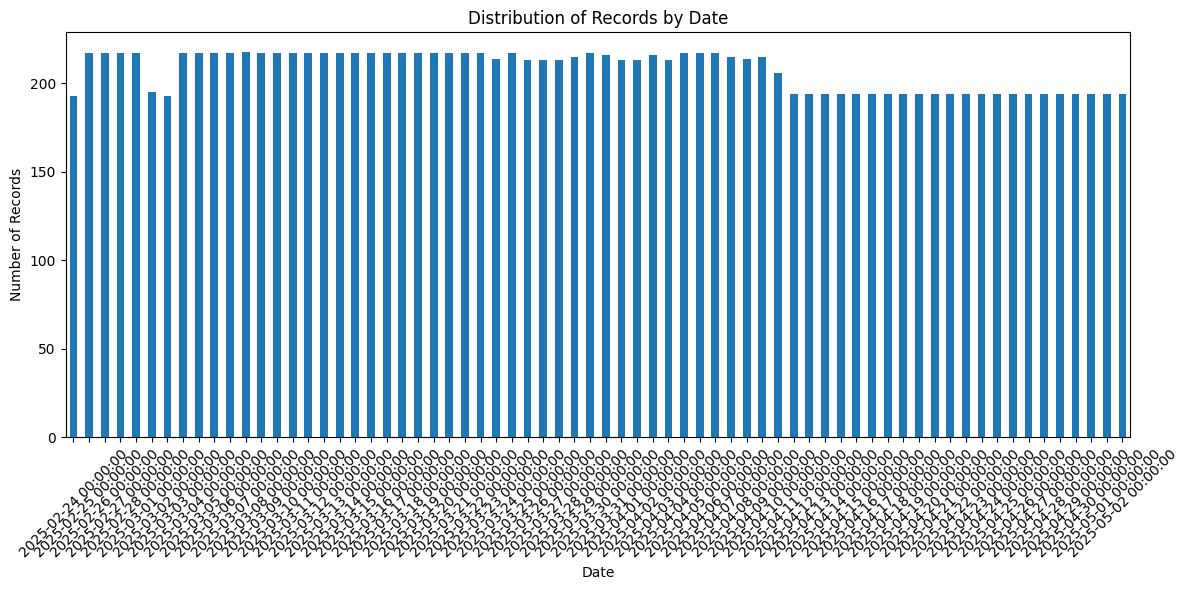

In [4]:
import matplotlib.pyplot as plt

# Get min and max dates
min_date = point_est_price_df['run_date'].min()
max_date = point_est_price_df['run_date'].max()



# Create a count plot of dates to see distribution
plt.figure(figsize=(12, 6))
point_est_price_df['run_date'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Records by Date')
plt.xlabel('Date')
plt.ylabel('Number of Records')
plt.xticks(rotation=45)
plt.tight_layout()

In [5]:
# sort by run_time and target_datetime
point_est_price_df = point_est_price_df.sort_values(by=['run_time', 'target_datetime'])

In [6]:
# Count rows before dropping
rows_before = len(point_est_price_df)

# Drop rows where target_datetime date equals run_date
point_est_price_df = point_est_price_df[point_est_price_df['target_datetime'].dt.date != point_est_price_df['run_date'].dt.date]

# Count rows after dropping
rows_after = len(point_est_price_df)
rows_dropped = rows_before - rows_after

print(f"Rows dropped: {rows_dropped}")
print(f"\nShape after dropping: {point_est_price_df.shape}")
print("\nFirst 5 rows:")
print(point_est_price_df.head())
print("\nLast 5 rows:")
print(point_est_price_df.tail())

Rows dropped: 1631

Shape after dropping: (12501, 5)

First 5 rows:
     Price_Pred                         run_time   run_date  run_hour  \
145       0.090 2025-02-24 15:40:49.845469+00:00 2025-02-24        15   
151       0.087 2025-02-24 15:40:49.845469+00:00 2025-02-24        15   
157       0.087 2025-02-24 15:40:49.845469+00:00 2025-02-24        15   
163       0.087 2025-02-24 15:40:49.845469+00:00 2025-02-24        15   
169       0.090 2025-02-24 15:40:49.845469+00:00 2025-02-24        15   

        target_datetime  
145 2025-02-25 00:00:00  
151 2025-02-25 01:00:00  
157 2025-02-25 02:00:00  
163 2025-02-25 03:00:00  
169 2025-02-25 04:00:00  

Last 5 rows:
         Price_Pred                         run_time   run_date  run_hour  \
1632660       0.083 2025-05-02 00:00:05.000644+00:00 2025-05-02         0   
1632665       0.050 2025-05-02 00:00:05.000644+00:00 2025-05-02         0   
1632670       0.034 2025-05-02 00:00:05.000644+00:00 2025-05-02         0   
1632675       0

In [10]:
import pandas as pd

csv_path = "../../../workspaces/sharell/random_forest_predictions_with_actuals.csv"

# 1. Lees de bestaande CSV in
base_df = pd.read_csv(csv_path)

# 2. Beide kolommen naar datetime mét UTC
base_df['target_datetime'] = pd.to_datetime(base_df['target_datetime'], utc=True)
base_df['run_date'] = pd.to_datetime(base_df['run_date'], utc=True)

point_est_price_df['target_datetime'] = pd.to_datetime(point_est_price_df['target_datetime'], utc=True)
point_est_price_df['run_date'] = pd.to_datetime(point_est_price_df['run_date'], utc=True)

# 3. Kolom hernoemen
df = point_est_price_df.rename(columns={"Price_Pred": "oxygent_price"})

# 4. Merge
merged_df = base_df.merge(
    df[['target_datetime', 'run_date', 'oxygent_price']],
    on=['target_datetime', 'run_date'],
    how='left'
)

# 5. Terugschrijven
merged_df.to_csv(csv_path, index=False)
print(f"✅ Merge compleet en zonder typefouten! Laatste regels:\n", merged_df.tail())

✅ Merge compleet en zonder typefouten! Laatste regels:
                       run_date           target_datetime  predicted_Price  \
4315 2025-04-13 00:00:00+00:00 2025-04-19 20:00:00+00:00         0.092347   
4316 2025-04-13 00:00:00+00:00 2025-04-19 21:00:00+00:00         0.100777   
4317 2025-04-13 00:00:00+00:00 2025-04-19 22:00:00+00:00         0.093272   
4318 2025-04-13 00:00:00+00:00 2025-04-19 23:00:00+00:00         0.091806   
4319 2025-04-13 00:00:00+00:00 2025-04-20 00:00:00+00:00         0.091289   

      actual_Price  oxygent_price  
4315       0.11990          0.162  
4316       0.10390          0.148  
4317       0.09441          0.145  
4318       0.09800          0.130  
4319       0.09075          0.113  


In [16]:
import plotly.graph_objects as go

# Load and prep data
df = pd.read_csv(csv_path).dropna(subset=['predicted_Price', 'actual_Price', 'oxygent_price'])
df['run_date'] = pd.to_datetime(df['run_date'])

# Calculate performance metrics
rmse_rf = np.sqrt(mean_squared_error(df['actual_Price'], df['predicted_Price']))
rmse_ox = np.sqrt(mean_squared_error(df['actual_Price'], df['oxygent_price']))
std_rf = np.std(df['actual_Price'] - df['predicted_Price'])
std_ox = np.std(df['actual_Price'] - df['oxygent_price'])

# Print performance
print("MODEL PERFORMANCE:")
print(f"Random Forest - RMSE: €{rmse_rf:.4f}/kWh, SD: €{std_rf:.4f}/kWh")
print(f"Oxygent       - RMSE: €{rmse_ox:.4f}/kWh, SD: €{std_ox:.4f}/kWh")

# Calculate daily averages for plot
daily_avg = df.groupby('run_date')[['actual_Price', 'predicted_Price', 'oxygent_price']].mean().reset_index()

# Interactive plot
fig = go.Figure()
fig.add_trace(go.Scatter(x=daily_avg['run_date'], y=daily_avg['actual_Price'], name='Actual Price', line=dict(color='black', width=2)))
fig.add_trace(go.Scatter(x=daily_avg['run_date'], y=daily_avg['predicted_Price'], name=f'Random Forest', line=dict(color='green', width=1.5)))
fig.add_trace(go.Scatter(x=daily_avg['run_date'], y=daily_avg['oxygent_price'], name=f'Oxygent', line=dict(color='blue', width=1.5)))

fig.update_layout(title='Daily Average Price Predictions vs Actual', xaxis_title='Run Date', yaxis_title='Price (€/kWh)', 
                  hovermode='x unified', plot_bgcolor='white', paper_bgcolor='white')
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')
fig.show()

MODEL PERFORMANCE:
Random Forest - RMSE: €0.0353/kWh, SD: €0.0351/kWh
Oxygent       - RMSE: €0.0772/kWh, SD: €0.0769/kWh
